In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\LU VINH XUYEN\\Downloads\\Pokemon.csv',  encoding='latin-1')
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
#Prepare
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1','Type 2', 'Generation','Legendary','#']
df = df[types].drop(columns = drop_cols)
df.head(5)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [4]:
from sklearn.cluster import KMeans
import numpy as np 

In [5]:
kmeans =KMeans(n_clusters=3, random_state =0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
df.head(5)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster
0,Bulbasaur,318,45,49,49,65,65,45,2
1,Ivysaur,405,60,62,63,80,80,60,2
2,Venusaur,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,0
4,Charmander,309,39,52,43,60,50,65,2


In [6]:
#get centroids - Lấy giá trị trung bình Att, Def của từng cụm
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
#Là cách viết gọn của 
#for i in centroids : cen_x = i[0]
cen_y = [i[1] for i in centroids]

In [7]:
# mapping and add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})

In [8]:
#Define and map colors
colors = ['#DF2020','#81DF20','#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]}) 


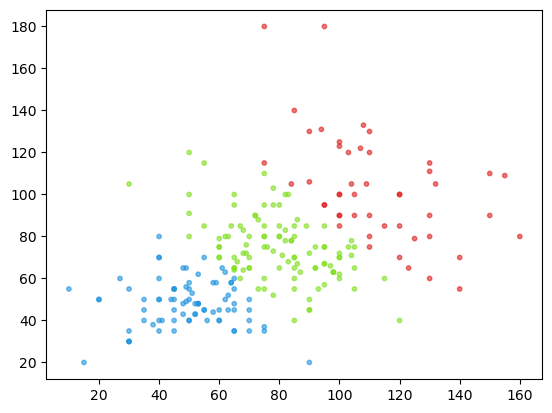

In [9]:
#Visualize
import matplotlib.pyplot as plt 
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10) # s is size

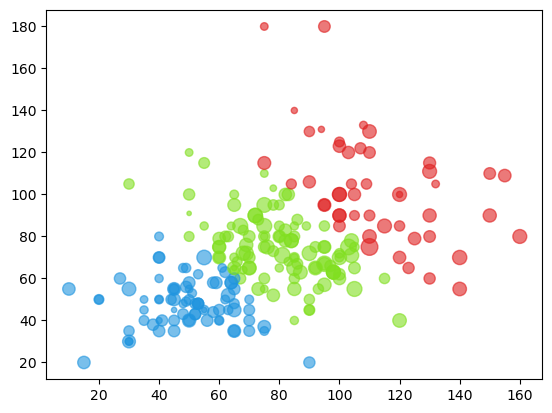

In [10]:
#Visualize with s = Speed
plt.scatter(df.Attack, df.Defense, c = df.c, s= df.Speed, alpha = 0.6 )

Predict with 3 variables

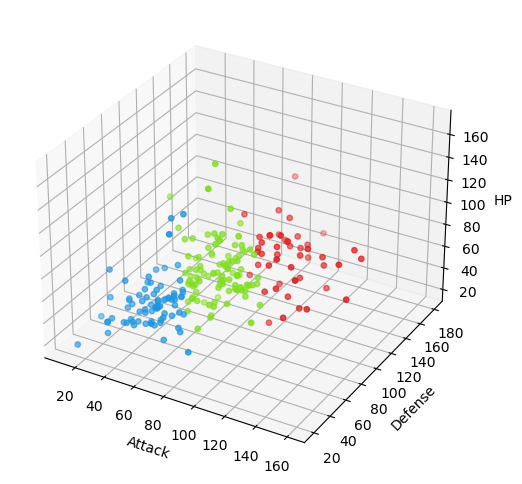

In [11]:
from mpl_toolkits.mplot3d import Axes3D
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters = 3, random_state =0)
df['clusters'] = kmeans.fit_predict(df[['Attack','Defense','HP']])
df['cs'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize =(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Attack, df.Defense, df.HP,c =df.cs,s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()

In [ ]:
#